In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False, version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

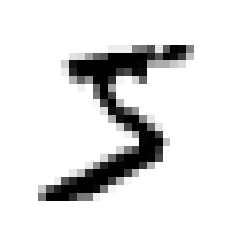

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

In [6]:
import numpy as np

y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [9]:
from sklearn.metrics import precision_score

precision_score(y_test, knn_clf.predict(X_test), average="macro")
# 0.9692753386570571


0.9692753386570571

In [10]:
from sklearn.model_selection import GridSearchCV
knn_clf2 = KNeighborsClassifier()

weights = ["uniform", "distance"]
n_neighbors = np.arange(5, 7)

hyperparameters = dict(weights=weights, n_neighbors=n_neighbors)

# clf = GridSearchCV(knn_clf2, hyperparameters, cv=2, return_train_score=False)
# clf.fit(X_train, y_train)
# precision_score(y_test, clf.predict(X_test), average="macro")
# 0.9712960369769521


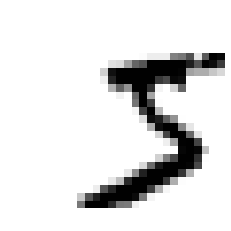

In [11]:

import cv2 
def move_img(img, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.imshow(move_img(some_digit_image, 5, 1), cmap="binary")
plt.axis("off")
plt.show()


- data 

In [12]:
X_train_x1 = [move_img(x.reshape(28, 28), 1, 0).reshape(-1) for x in X_train]
X_train_x2 = [move_img(x.reshape(28, 28), -1, 0).reshape(-1) for x in X_train]
X_train_y1 = [move_img(x.reshape(28, 28), 0, 1).reshape(-1) for x in X_train]
X_train_y2 = [move_img(x.reshape(28, 28), 0, -1).reshape(-1) for x in X_train]

X_train_all = np.concatenate([X_train, X_train_x1, X_train_x2, X_train_y1, X_train_y2], axis=0)
y_train_all = np.concatenate(
    [y_train, y_train, y_train, y_train, y_train], axis=0)

In [ ]:
knn_clf3 = KNeighborsClassifier()
knn_clf3.fit(X_train_all, y_train_all)
precision_score(y_test, knn_clf3.predict(X_test), average="macro")
# 0.9758214273716403


0.9758214273716403

In [ ]:
clf = GridSearchCV(knn_clf3, hyperparameters, cv=3, return_train_score=False)
clf.fit(X_train_all, y_train_all)
precision_score(y_test, clf.predict(X_test), average="macro")
